# Laden der Bibliotheken

In [5]:
import matplotlib.pyplot as plt
import IPython.display as ipd #Regler für die Audiowiedergabe
from scipy import signal #SciPy für die Signalverarbeitung
from scipy.io import wavfile
import scipy
import numpy as np
from scipy.fftpack import fft
import librosa
from numpy import mean, sqrt, square, arange
from scipy import signal
import pandas as pd
import IPython
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from scipy import ndimage
from matplotlib import transforms

In [6]:
import librosa, librosa.display

# Laden der Audiodaten

## Drehzahlvergleich

# Vergleich der Drehzahl mittels Welch Transformation

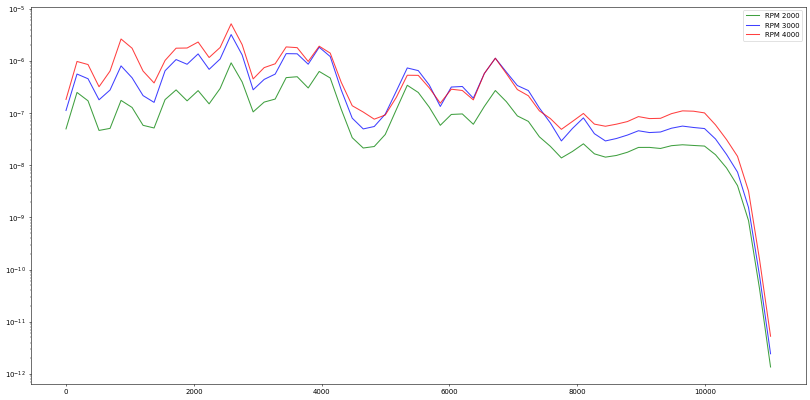

In [14]:
RPM2000, RPM2000_f = librosa.load('Data\Lager_test_RPM2000_Nr(2).wav', mono=True)
RPM3000, RPM3000_f = librosa.load('Data\Lager_test_RPM3000_Nr(2).wav', mono=True)
RPM4000, RPM4000_f = librosa.load('Data\Lager_test_RPM4000_Nr(2).wav', mono=True)



plt.figure
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=50)

RPM2000_f, RPM2000_PSD = signal.welch(RPM2000, RPM2000_f, nperseg=128, scaling='density')
plt.semilogy(RPM2000_f, RPM2000_PSD,label = 'RPM 2000', color ='green', alpha=0.75)

RPM3000_f, RPM3000_PSD = signal.welch(RPM3000, RPM3000_f, nperseg=128, scaling='density')
plt.semilogy(RPM3000_f, RPM3000_PSD,label = 'RPM 3000', color ='blue', alpha=0.75)

RPM4000_f, RPM4000_PSD = signal.welch(RPM4000, RPM4000_f, nperseg=128, scaling='density')
plt.semilogy(RPM4000_f, RPM4000_PSD,label = 'RPM 4000', color ='red', alpha=0.75)


plt.legend(loc='upper right')


# Filtern der Daten

In [36]:
RPM2000, RPM2000_f = librosa.load('Data\Lager_test_RPM2000_Nr(2).wav', mono=True)
RPM3000, RPM3000_f = librosa.load('Data\Lager_test_RPM3000_Nr(2).wav', mono=True)
RPM4000, RPM4000_f = librosa.load('Data\Lager_test_RPM4000_Nr(2).wav', mono=True)

# RPM 2000 Bandpass 300 Hz
b, a = signal.butter(3, 300/ (RPM2000_f), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter2000 = signal.filtfilt(b, a, RPM2000)
ipd.Audio(Filter, rate=RPM2000_f)

In [37]:
# RPM 3000 Bandpass 300 Hz
b, a = signal.butter(3, 300/ (RPM3000_f), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter3000 = signal.filtfilt(b, a, RPM3000)
ipd.Audio(Filter, rate=RPM3000_f)

In [40]:
# RPM 4000 Bandpass 300 Hz
b, a = signal.butter(3, 300/ (RPM4000_f), 'low', analog = False) #Die Frequenz über 300 Hz abgeschnitten
Filter4000 = signal.filtfilt(b, a, RPM4000)
ipd.Audio(Filter, rate=RPM4000_f)

## Vergleich der Drehzahl mittels Spektrogramm der Frequenzen über die Zeit

<Figure size 432x288 with 0 Axes>

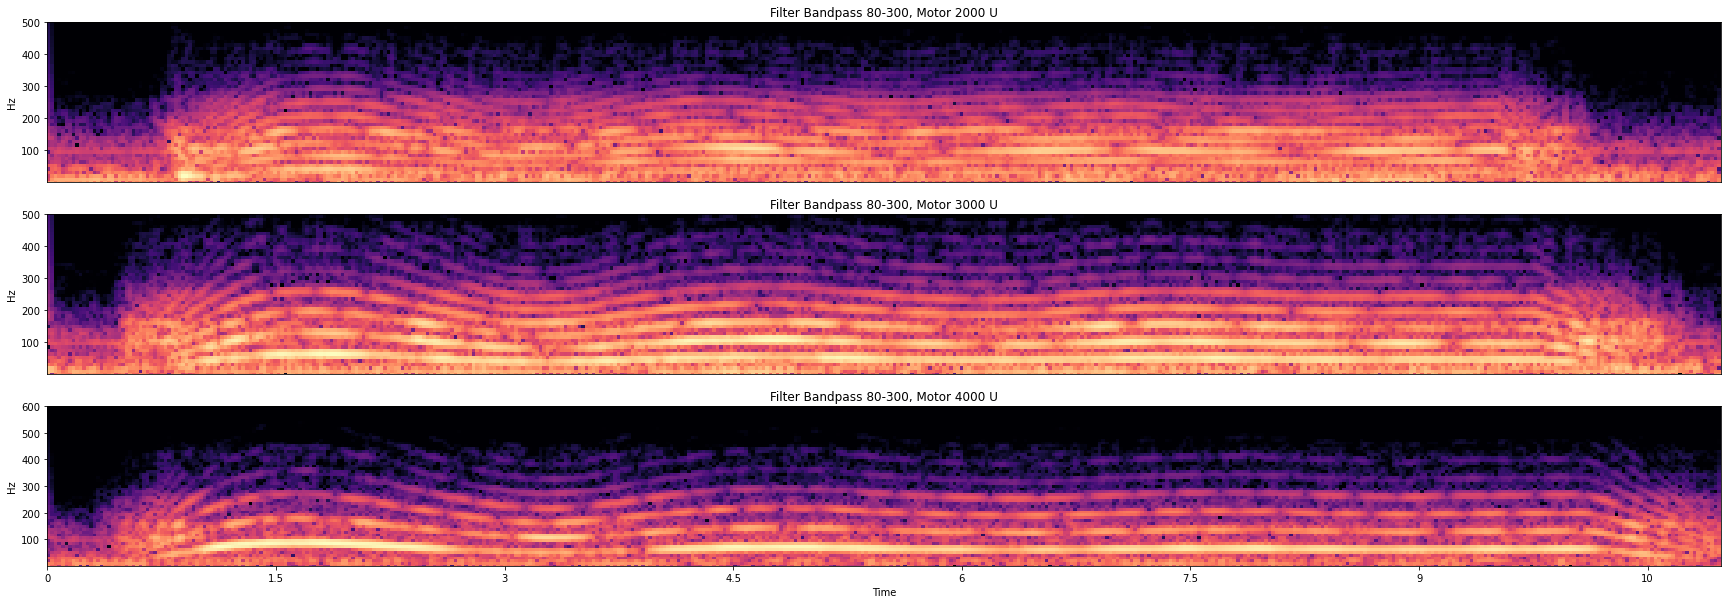

In [42]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)

gs = gridspec.GridSpec(3, 1)

plt.figure(figsize=(30, 10))
# Subplot 2
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0

X2000 = librosa.stft(Filter2000)
Xdb2000 = librosa.amplitude_to_db(abs(X2000))
librosa.display.specshow(Xdb2000, sr=RPM2000_f, y_axis='hz')
plt.ylim(1,500)
plt.title('Filter Bandpass 80-300, Motor 2000 U')


#ax1.set_title('Signal des Motors bei 2000, 3000 und 4000 Umdrehungen', fontsize = 10)

# Subplot 2
ax2 = plt.subplot(gs[1, 0]) # row 0, col 1
X3000 = librosa.stft(Filter3000)
Xdb3000 = librosa.amplitude_to_db(abs(X3000))
librosa.display.specshow(Xdb3000, sr=RPM3000_f, y_axis='hz')
plt.ylim(1,500)
plt.title('Filter Bandpass 80-300, Motor 3000 U')

# Subplot 3
ax3 = plt.subplot(gs[2, 0]) # row 0, col 1
X4000 = librosa.stft(Filter4000)
Xdb4000 = librosa.amplitude_to_db(abs(X4000))
librosa.display.specshow(Xdb4000, sr=RPM3000_f, x_axis='time', y_axis='hz')
plt.title('Filter Bandpass 80-300, Motor 4000 U')
#plt.savefig('Spektrogramm.png')
plt.ylim(1,600)
plt.show()

## Vergleich der Drehzahlen mittels Root Mean Square

In [48]:
X3000

array([[-1.71986504e+00+0.00000000e+00j, -2.31707455e-02+0.00000000e+00j,
         4.47216750e-01+0.00000000e+00j, ...,
        -9.48952410e-02+0.00000000e+00j, -8.16787151e-01+0.00000000e+00j,
        -1.14768889e+00+0.00000000e+00j],
       [ 2.49921527e+00+2.23345648e-17j, -9.39040078e-01+1.75271350e+00j,
        -4.14758655e-01-1.29821355e+00j, ...,
        -1.11020895e-01-3.90086494e-01j,  5.67640117e-01-3.20710201e-01j,
         6.09031928e-01+2.15902435e-04j],
       [-2.21386930e+00-5.00529364e-17j,  1.39341812e+00-1.30801729e+00j,
        -1.34423179e-01+1.22424072e+00j, ...,
         2.35940289e-01+1.84975489e-01j, -2.27570508e-01+3.84737032e-02j,
         1.07164854e-02+3.14540698e-04j],
       ...,
       [ 2.46656413e-05+6.68484953e-18j, -1.23328065e-05+1.21723853e-10j,
        -1.17431759e-11-8.58402238e-12j, ...,
         6.77236045e-15+4.58004468e-12j, -6.74666446e-08+4.16366816e-10j,
         1.34513462e-07-8.25371987e-10j],
       [-2.46654565e-05+1.95156391e-18j,  5.

## Root Mean Square

# Generierung von Features

## Mittelwert der Leistungsdichte für die Drehzahlen

In [47]:
print(np.mean(RPM2000_PSD))
print(np.mean(RPM3000_PSD))
print(np.mean(RPM4000_PSD))

1.3845238e-07
4.4435248e-07
6.634324e-07


In [53]:
print("Maximum im Welch Signal bei Drehzahl 2000:", np.max(RPM2000_PSD))
print("Maximum im Welch Signal bei Drehzahl 3000:", np.max(RPM3000_PSD))
print("Maximum im Welch Signal bei Drehzahl 4000:",np.max(RPM4000_PSD))

Maximum im Welch Signal bei Drehzahl 2000: 9.239691e-07
Maximum im Welch Signal bei Drehzahl 3000: 3.2203718e-06
Maximum im Welch Signal bei Drehzahl 4000: 5.180898e-06


In [54]:
print("Minimum im Welch Signal bei Drehzahl 2000:", np.min(RPM2000_PSD))
print("Minimum im Welch Signal bei Drehzahl 3000:", np.min(RPM3000_PSD))
print("Minimum im Welch Signal bei Drehzahl 4000:",np.min(RPM4000_PSD))

Minimum im Welch Signal bei Drehzahl 2000: 1.3572257e-12
Minimum im Welch Signal bei Drehzahl 3000: 2.4338997e-12
Minimum im Welch Signal bei Drehzahl 4000: 5.2775857e-12


In [ ]:
x = x2000_F1, x2000F2, x3 ....

y = Zustand2000, Zustand2000